In [1]:
import torch

import numpy as np
import matplotlib.pyplot as plt

from scipy.io import loadmat
from BO import BayesianOptimizer

In [2]:
data = loadmat("datasets/neurostim/Cebus1_M1_190221.mat")["Cebus1_M1_190221"]
emgs = np.squeeze(data["emgs"][0][0], axis=0)

ch2xy = data["ch2xy"][0][0] - 1

sorted_resp = data["sorted_resp"][0, 0].T
sorted_isvalid = data["sorted_isvalid"][0, 0].T
response = np.zeros((sorted_resp[0, 0].shape[0], emgs.shape[0], sorted_resp.shape[1]))
valid = np.zeros((sorted_resp[0, 0].shape[0], emgs.shape[0], sorted_resp.shape[1]))
for emg in range(emgs.shape[0]):
    for chan in range(sorted_resp.shape[1]):
        valid[:, emg, chan] = np.squeeze(sorted_isvalid[emg, chan], axis=1)
        valid[valid == -1] = 1
        response[:, emg, chan] = (
            np.squeeze(sorted_resp[emg, chan], axis=1) * valid[:, emg, chan]
        )


print(response.shape)
print(ch2xy.shape)

ch2xy = torch.from_numpy(ch2xy).float()
response = torch.from_numpy(response).float()

(28, 6, 96)
(96, 2)


emg  0


100%|██████████| 30/30 [00:51<00:00,  1.73s/it]


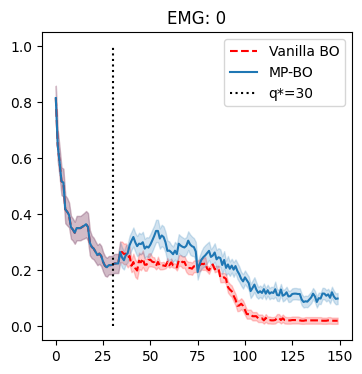

emg  1


100%|██████████| 30/30 [00:52<00:00,  1.74s/it]


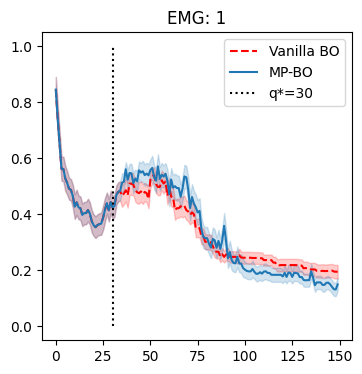

emg  2


100%|██████████| 30/30 [00:51<00:00,  1.72s/it]


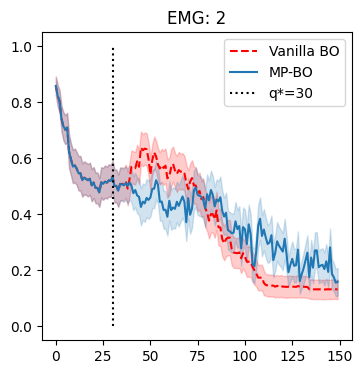

emg  3


100%|██████████| 30/30 [00:52<00:00,  1.74s/it]


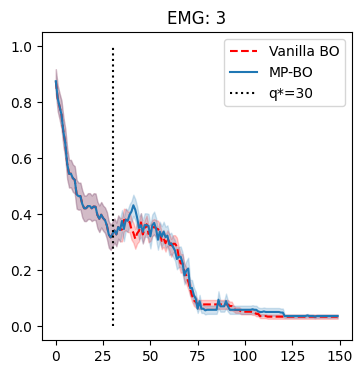

emg  4


100%|██████████| 30/30 [00:53<00:00,  1.77s/it]


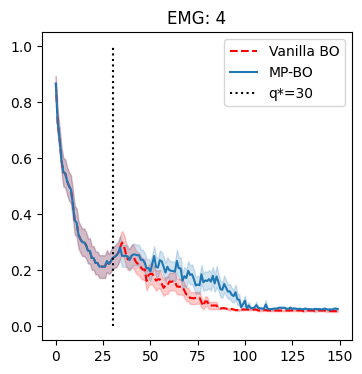

emg  5


100%|██████████| 30/30 [00:52<00:00,  1.74s/it]


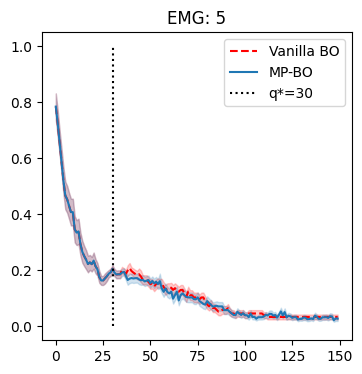

Text(0.5, 1.0, 'Mean')

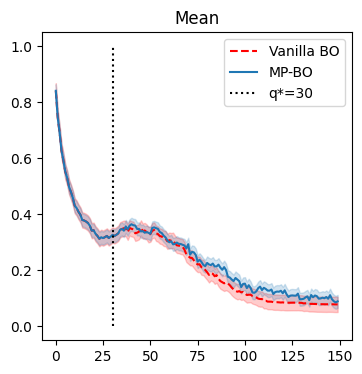

In [6]:
mean_regret_gpbo = np.zeros((response.shape[1], 150))
mean_regret_mpbo = np.zeros((response.shape[1], 150))

for emg in range(response.shape[1]):
    print("emg ", emg)
    response_emg = response[:, emg, :]

    opt = BayesianOptimizer(ch2xy, response_emg)

    regret_gpbo, baseline = opt.train(
        4,
        initial_points=1,
        repetitions=30,
        iterations=150,
        strategy="Vanilla BO",
    )
    regret_mpbo, _ = opt.train(
        4,
        repetitions=30,
        iterations=150,
        strategy="MP-BO",
        begin_strat=35,
        initial_points=35,
        follow_baseline=baseline,
    )

    mean_regret_gpbo[emg] = regret_gpbo.mean(0)
    mean_regret_mpbo[emg] = regret_mpbo.mean(0)

    plt.figure(figsize=(4, 4))
    plt.plot(regret_gpbo.mean(0), color="red", linestyle="--", label="Vanilla BO")
    plt.fill_between(
        range(150),
        regret_gpbo.mean(0) - regret_gpbo.std(0) / np.sqrt(30),
        regret_gpbo.mean(0) + regret_gpbo.std(0) / np.sqrt(30),
        color="red",
        alpha=0.2,
    )
    plt.plot(regret_mpbo.mean(0), color="tab:blue", label="MP-BO")
    plt.fill_between(
        range(150),
        regret_mpbo.mean(0) - regret_mpbo.std(0) / np.sqrt(30),
        regret_mpbo.mean(0) + regret_mpbo.std(0) / np.sqrt(30),
        color="tab:blue",
        alpha=0.2,
    )
    plt.vlines(30, 0, 1, linestyle="dotted", label="q*=30", color="k")
    plt.legend()
    plt.title(f"EMG: {emg}")
    plt.show()


mean_regret_gpbo = mean_regret_gpbo.mean(0)
mean_regret_mpbo = mean_regret_mpbo.mean(0)

plt.figure(figsize=(4, 4))
plt.plot(mean_regret_gpbo, color="red", linestyle="--", label="Vanilla BO")
plt.fill_between(
    range(150),
    mean_regret_gpbo - np.std(mean_regret_gpbo) / np.sqrt(30),
    mean_regret_gpbo + np.std(mean_regret_gpbo) / np.sqrt(30),
    color="red",
    alpha=0.2,
)
plt.plot(mean_regret_mpbo, color="tab:blue", label="MP-BO")
plt.fill_between(
    range(150),
    mean_regret_mpbo - np.std(mean_regret_mpbo) / np.sqrt(30 + response.shape[1]),
    mean_regret_mpbo + np.std(mean_regret_mpbo) / np.sqrt(30 + response.shape[1]),
    color="tab:blue",
    alpha=0.2,
)
plt.vlines(35, 0, 1, linestyle="dotted", label="q*=30", color="k")
plt.legend()
plt.title("Mean")

In [7]:
data = loadmat("datasets/neurostim/Cebus2_M1_200123.mat")["Cebus2_M1_200123"]
emgs = np.squeeze(data["emgs"][0][0], axis=0)

ch2xy = data["ch2xy"][0][0] - 1

sorted_resp = data["sorted_resp"][0, 0].T
sorted_isvalid = data["sorted_isvalid"][0, 0].T
response = np.zeros((sorted_resp[0, 0].shape[0], emgs.shape[0], sorted_resp.shape[1]))
valid = np.zeros((sorted_resp[0, 0].shape[0], emgs.shape[0], sorted_resp.shape[1]))
for emg in range(emgs.shape[0]):
    for chan in range(sorted_resp.shape[1]):
        valid[:, emg, chan] = np.squeeze(sorted_isvalid[emg, chan], axis=1)
        valid[valid == -1] = 1
        response[:, emg, chan] = (
            np.squeeze(sorted_resp[emg, chan], axis=1) * valid[:, emg, chan]
        )


print(response.shape)
print(ch2xy.shape)

ch2xy = torch.from_numpy(ch2xy).float()
response = torch.from_numpy(response).float()

(20, 8, 96)
(96, 2)


100%|██████████| 30/30 [00:54<00:00,  1.80s/it]


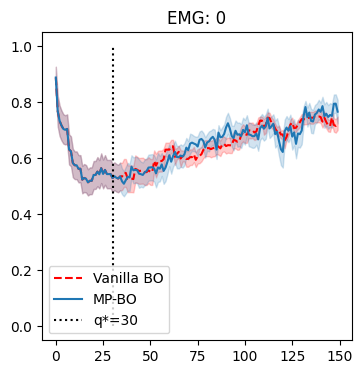

100%|██████████| 30/30 [00:52<00:00,  1.75s/it]


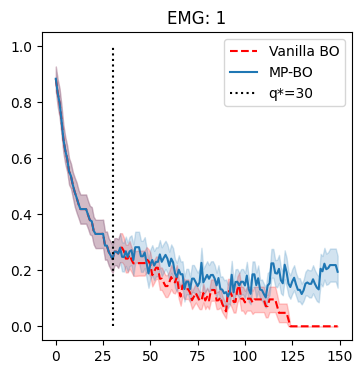

100%|██████████| 30/30 [00:52<00:00,  1.75s/it]


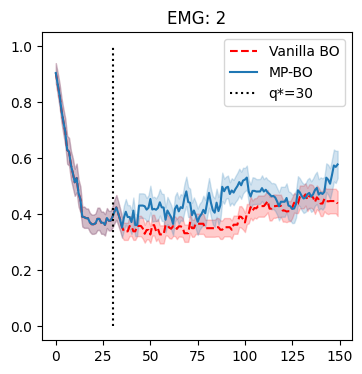

100%|██████████| 30/30 [00:51<00:00,  1.73s/it]


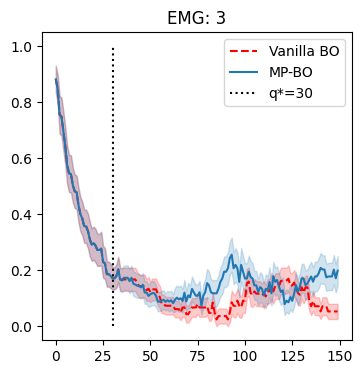

100%|██████████| 30/30 [00:53<00:00,  1.78s/it]


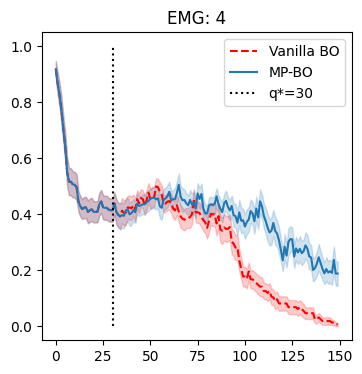

100%|██████████| 30/30 [00:56<00:00,  1.87s/it]


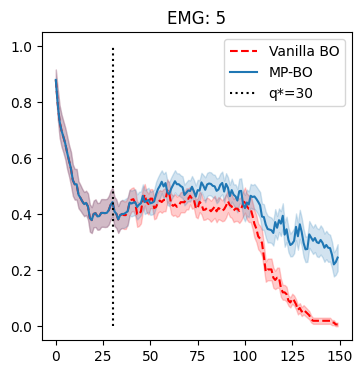

100%|██████████| 30/30 [00:55<00:00,  1.85s/it]


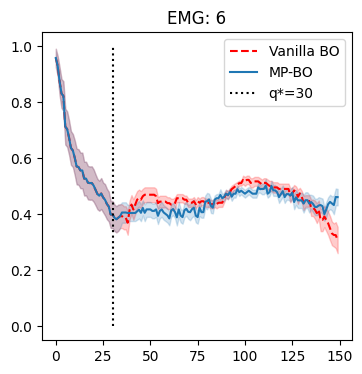

100%|██████████| 30/30 [00:51<00:00,  1.72s/it]


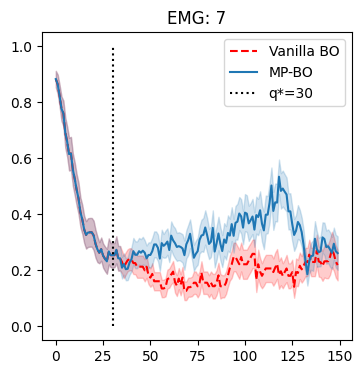

Text(0.5, 1.0, 'Mean')

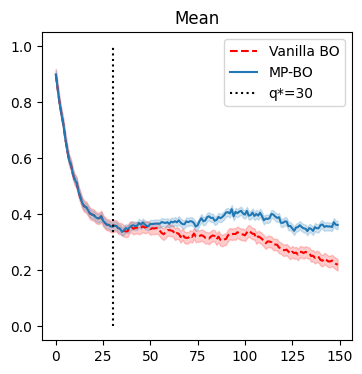

In [8]:
mean_regret_gpbo = np.zeros((response.shape[1], 150))
mean_regret_mpbo = np.zeros((response.shape[1], 150))

for emg in range(response.shape[1]):
    response_emg = response[:, emg, :]

    opt = BayesianOptimizer(ch2xy, response_emg)

    regret_gpbo, baseline = opt.train(
        20,
        initial_points=1,
        repetitions=30,
        iterations=150,
        strategy="Vanilla BO",
    )
    regret_mpbo, _ = opt.train(
        20,
        repetitions=30,
        iterations=150,
        strategy="MP-BO",
        begin_strat=35,
        initial_points=35,
        follow_baseline=baseline,
    )

    mean_regret_gpbo[emg] = regret_gpbo.mean(0)
    mean_regret_mpbo[emg] = regret_mpbo.mean(0)

    plt.figure(figsize=(4, 4))
    plt.plot(regret_gpbo.mean(0), color="red", linestyle="--", label="Vanilla BO")
    plt.fill_between(
        range(150),
        regret_gpbo.mean(0) - regret_gpbo.std(0) / np.sqrt(30),
        regret_gpbo.mean(0) + regret_gpbo.std(0) / np.sqrt(30),
        color="red",
        alpha=0.2,
    )
    plt.plot(regret_mpbo.mean(0), color="tab:blue", label="MP-BO")
    plt.fill_between(
        range(150),
        regret_mpbo.mean(0) - regret_mpbo.std(0) / np.sqrt(30),
        regret_mpbo.mean(0) + regret_mpbo.std(0) / np.sqrt(30),
        color="tab:blue",
        alpha=0.2,
    )
    plt.vlines(30, 0, 1, linestyle="dotted", label="q*=30", color="k")
    plt.legend()
    plt.title(f"EMG: {emg}")
    plt.show()


mean_regret_gpbo = mean_regret_gpbo.mean(0)
mean_regret_mpbo = mean_regret_mpbo.mean(0)

plt.figure(figsize=(4, 4))
plt.plot(mean_regret_gpbo, color="red", linestyle="--", label="Vanilla BO")
plt.fill_between(
    range(150),
    mean_regret_gpbo - np.std(mean_regret_gpbo) / np.sqrt(30),
    mean_regret_gpbo + np.std(mean_regret_gpbo) / np.sqrt(30),
    color="red",
    alpha=0.2,
)
plt.plot(mean_regret_mpbo, color="tab:blue", label="MP-BO")
plt.fill_between(
    range(150),
    mean_regret_mpbo - np.std(mean_regret_mpbo) / np.sqrt(30 + response.shape[1]),
    mean_regret_mpbo + np.std(mean_regret_mpbo) / np.sqrt(30 + response.shape[1]),
    color="tab:blue",
    alpha=0.2,
)
plt.vlines(35, 0, 1, linestyle="dotted", label="q*=35", color="k")
plt.legend()
plt.title("Mean")

In [9]:
data = loadmat("datasets/neurostim/Macaque1_M1_181212.mat")["Macaque1_M1_181212"]
emgs = np.squeeze(data["emgs"][0][0], axis=0)

ch2xy = data["ch2xy"][0][0] - 1

sorted_resp = data["sorted_resp"][0, 0].T
sorted_isvalid = data["sorted_isvalid"][0, 0].T
response = np.zeros((sorted_resp[0, 0].shape[0], emgs.shape[0], sorted_resp.shape[1]))
valid = np.zeros((sorted_resp[0, 0].shape[0], emgs.shape[0], sorted_resp.shape[1]))
for emg in range(emgs.shape[0]):
    for chan in range(sorted_resp.shape[1]):
        valid[:, emg, chan] = np.squeeze(sorted_isvalid[emg, chan], axis=1)
        valid[valid == -1] = 1
        response[:, emg, chan] = (
            np.squeeze(sorted_resp[emg, chan], axis=1) * valid[:, emg, chan]
        )


print(response.shape)
print(ch2xy.shape)

ch2xy = torch.from_numpy(ch2xy).float()
response = torch.from_numpy(response).float()

(20, 4, 96)
(96, 2)


100%|██████████| 30/30 [00:52<00:00,  1.75s/it]


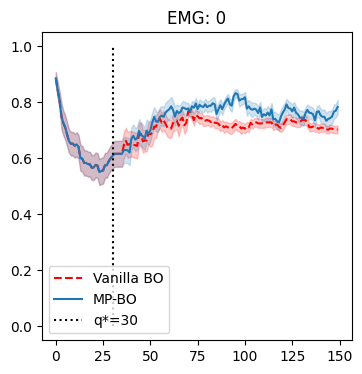

100%|██████████| 30/30 [00:53<00:00,  1.77s/it]


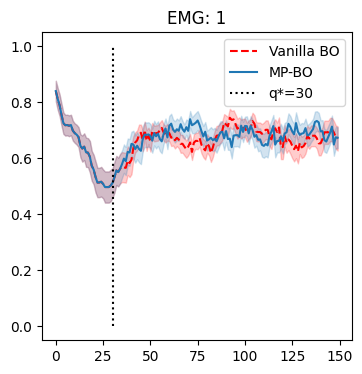

100%|██████████| 30/30 [00:53<00:00,  1.79s/it]


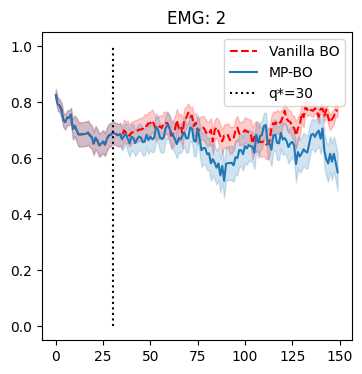

100%|██████████| 30/30 [00:57<00:00,  1.92s/it]


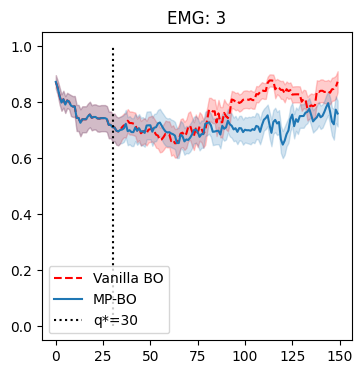

Text(0.5, 1.0, 'Mean')

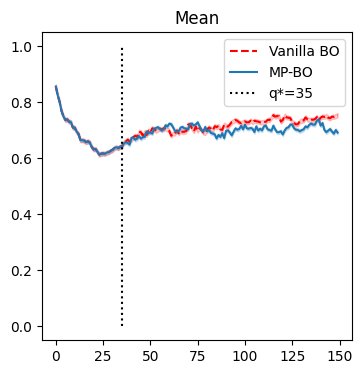

In [10]:
mean_regret_gpbo = np.zeros((response.shape[1], 150))
mean_regret_mpbo = np.zeros((response.shape[1], 150))

for emg in range(response.shape[1]):
    response_emg = response[:, emg, :]

    opt = BayesianOptimizer(ch2xy, response_emg)

    regret_gpbo, baseline = opt.train(
        20,
        initial_points=1,
        repetitions=30,
        iterations=150,
        strategy="Vanilla BO",
    )
    regret_mpbo, _ = opt.train(
        20,
        repetitions=30,
        iterations=150,
        strategy="MP-BO",
        begin_strat=35,
        initial_points=35,
        follow_baseline=baseline,
    )

    mean_regret_gpbo[emg] = regret_gpbo.mean(0)
    mean_regret_mpbo[emg] = regret_mpbo.mean(0)

    plt.figure(figsize=(4, 4))
    plt.plot(regret_gpbo.mean(0), color="red", linestyle="--", label="Vanilla BO")
    plt.fill_between(
        range(150),
        regret_gpbo.mean(0) - regret_gpbo.std(0) / np.sqrt(30),
        regret_gpbo.mean(0) + regret_gpbo.std(0) / np.sqrt(30),
        color="red",
        alpha=0.2,
    )
    plt.plot(regret_mpbo.mean(0), color="tab:blue", label="MP-BO")
    plt.fill_between(
        range(150),
        regret_mpbo.mean(0) - regret_mpbo.std(0) / np.sqrt(30),
        regret_mpbo.mean(0) + regret_mpbo.std(0) / np.sqrt(30),
        color="tab:blue",
        alpha=0.2,
    )
    plt.vlines(30, 0, 1, linestyle="dotted", label="q*=30", color="k")
    plt.legend()
    plt.title(f"EMG: {emg}")
    plt.show()


mean_regret_gpbo = mean_regret_gpbo.mean(0)
mean_regret_mpbo = mean_regret_mpbo.mean(0)

plt.figure(figsize=(4, 4))
plt.plot(mean_regret_gpbo, color="red", linestyle="--", label="Vanilla BO")
plt.fill_between(
    range(150),
    mean_regret_gpbo - np.std(mean_regret_gpbo) / np.sqrt(30),
    mean_regret_gpbo + np.std(mean_regret_gpbo) / np.sqrt(30),
    color="red",
    alpha=0.2,
)
plt.plot(mean_regret_mpbo, color="tab:blue", label="MP-BO")
plt.fill_between(
    range(150),
    mean_regret_mpbo - np.std(mean_regret_mpbo) / np.sqrt(30 + response.shape[1]),
    mean_regret_mpbo + np.std(mean_regret_mpbo) / np.sqrt(30 + response.shape[1]),
    color="tab:blue",
    alpha=0.2,
)
plt.vlines(35, 0, 1, linestyle="dotted", label="q*=35", color="k")
plt.legend()
plt.title("Mean")

In [11]:
data = loadmat("datasets/neurostim/Macaque2_M1_190527.mat")["Macaque2_M1_190527"]
emgs = np.squeeze(data["emgs"][0][0], axis=0)

ch2xy = data["ch2xy"][0][0] - 1

sorted_resp = data["sorted_resp"][0, 0].T
sorted_isvalid = data["sorted_isvalid"][0, 0].T
response = np.zeros((sorted_resp[0, 0].shape[0], emgs.shape[0], sorted_resp.shape[1]))
valid = np.zeros((sorted_resp[0, 0].shape[0], emgs.shape[0], sorted_resp.shape[1]))
for emg in range(emgs.shape[0]):
    for chan in range(sorted_resp.shape[1]):
        valid[:, emg, chan] = np.squeeze(sorted_isvalid[emg, chan], axis=1)
        valid[valid == -1] = 1
        response[:, emg, chan] = (
            np.squeeze(sorted_resp[emg, chan], axis=1) * valid[:, emg, chan]
        )


print(response.shape)
print(ch2xy.shape)

ch2xy = torch.from_numpy(ch2xy).float()
response = torch.from_numpy(response).float()

(10, 4, 96)
(96, 2)


100%|██████████| 30/30 [00:53<00:00,  1.79s/it]


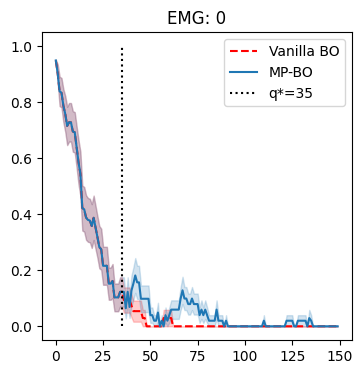

100%|██████████| 30/30 [00:54<00:00,  1.80s/it]


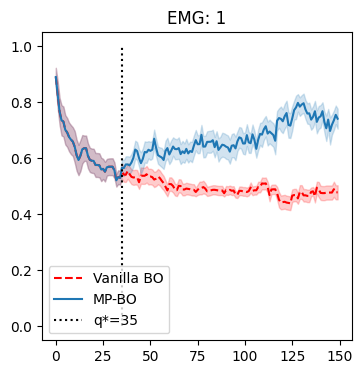

100%|██████████| 30/30 [00:53<00:00,  1.78s/it]


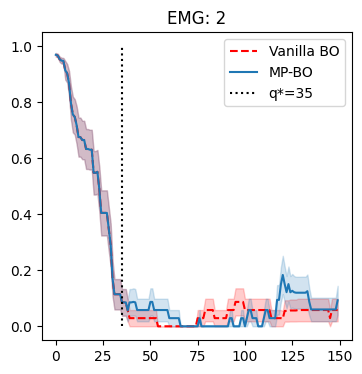

100%|██████████| 30/30 [00:53<00:00,  1.77s/it]


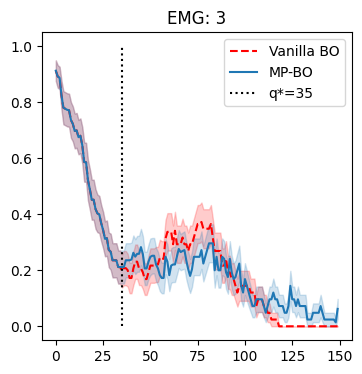

Text(0.5, 1.0, 'Mean')

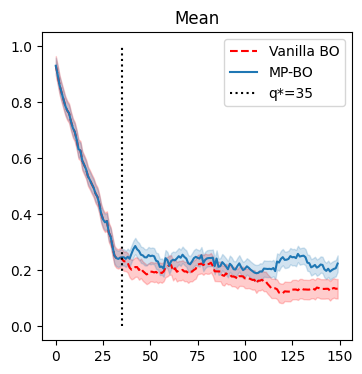

In [12]:
mean_regret_gpbo = np.zeros((response.shape[1], 150))
mean_regret_mpbo = np.zeros((response.shape[1], 150))

for emg in range(response.shape[1]):
    response_emg = response[:, emg, :]

    opt = BayesianOptimizer(ch2xy, response_emg)

    regret_gpbo, baseline = opt.train(
        20,
        initial_points=1,
        repetitions=30,
        iterations=150,
        strategy="Vanilla BO",
    )
    regret_mpbo, _ = opt.train(
        20,
        repetitions=30,
        iterations=150,
        strategy="MP-BO",
        begin_strat=35,
        initial_points=35,
        follow_baseline=baseline,
    )

    mean_regret_gpbo[emg] = regret_gpbo.mean(0)
    mean_regret_mpbo[emg] = regret_mpbo.mean(0)

    plt.figure(figsize=(4, 4))
    plt.plot(regret_gpbo.mean(0), color="red", linestyle="--", label="Vanilla BO")
    plt.fill_between(
        range(150),
        regret_gpbo.mean(0) - regret_gpbo.std(0) / np.sqrt(30),
        regret_gpbo.mean(0) + regret_gpbo.std(0) / np.sqrt(30),
        color="red",
        alpha=0.2,
    )
    plt.plot(regret_mpbo.mean(0), color="tab:blue", label="MP-BO")
    plt.fill_between(
        range(150),
        regret_mpbo.mean(0) - regret_mpbo.std(0) / np.sqrt(30),
        regret_mpbo.mean(0) + regret_mpbo.std(0) / np.sqrt(30),
        color="tab:blue",
        alpha=0.2,
    )
    plt.vlines(35, 0, 1, linestyle="dotted", label="q*=35", color="k")
    plt.legend()
    plt.title(f"EMG: {emg}")
    plt.show()


mean_regret_gpbo = mean_regret_gpbo.mean(0)
mean_regret_mpbo = mean_regret_mpbo.mean(0)

plt.figure(figsize=(4, 4))
plt.plot(mean_regret_gpbo, color="red", linestyle="--", label="Vanilla BO")
plt.fill_between(
    range(150),
    mean_regret_gpbo - np.std(mean_regret_gpbo) / np.sqrt(30),
    mean_regret_gpbo + np.std(mean_regret_gpbo) / np.sqrt(30),
    color="red",
    alpha=0.2,
)
plt.plot(mean_regret_mpbo, color="tab:blue", label="MP-BO")
plt.fill_between(
    range(150),
    mean_regret_mpbo - np.std(mean_regret_mpbo) / np.sqrt(30 + response.shape[1]),
    mean_regret_mpbo + np.std(mean_regret_mpbo) / np.sqrt(30 + response.shape[1]),
    color="tab:blue",
    alpha=0.2,
)
plt.vlines(35, 0, 1, linestyle="dotted", label="q*=35", color="k")
plt.legend()
plt.title("Mean")